#### **Hypothesis Testing**

##### Anderson - Darling Normality Test
- It is a goodness of fit which measures how well the data fits a specified ditribution.
- It is most commonly used to determine whether or not the data follows normal distribution.
- Usage: When Project Y is Continuous & to check whether Project Y is normal or non-normal.
- Null Hypothesis(H0): The Data is normally distributed or it fits in the normal distribution.
- Alternate Hypothesis(Ha): The Data is not normally distributed or it doesn't fits in the normal distribution.

In [2]:
# Let us first import a dataset which contains cycle time of money transfer banking transactions in hours.
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/Users/rahul_arora/Downloads/Cycle Time - Sheet1.csv")
df.head()

,Transaction ID,Cycle Time,City,Documented process available,Agent ID,Branch,Tenure,Shift,Day of Week,Week of Month
0,1001,5.75,Del,N,1,CP,625,M,Mon,3
1,1002,4.61,Del,Y,2,CP,702,M,Tue,4
2,1003,2.96,Hyd,Y,3,JP,887,M,Thu,5
3,1004,4.65,Del,N,1,CP,694,M,Tue,3
4,1005,3.13,Hyd,Y,1,JP,867,M,Wed,1


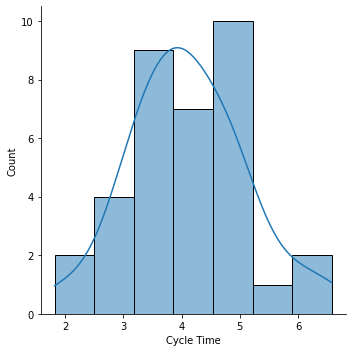

In [3]:
# let us first see through a histogram how the cycle time data is distributed.
sns.displot(data=df, x="Cycle Time", kind="hist", kde=True)  # seems like the data is normally distributed as evident by the KDE plot, but will confirm the same through normality test.

In [4]:
# let us now perform the Anderson_Darling Normality Test.
test_result = stats.anderson(df["Cycle Time"], dist="norm")
print(test_result)

test_statistic = test_result[0]
critical_value = test_result[1][2]
sig_level = test_result[2][2]

if test_statistic > critical_value:
    print("Verdict: Reject the null hypothesis")
    print(f"The given data is not normally distributed at {100 - (sig_level):.0f}% confidence level")
else:
    print("Verdict: Fail to reject the null hypothesis")
    print(f"The given data is normally distributed at {100 - (sig_level):.0f}% confidence level")

AndersonResult(statistic=0.2903419429972729, critical_values=array([0.527, 0.6  , 0.719, 0.839, 0.998]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Verdict: Fail to reject the null hypothesis
The given data is normally distributed at 95% confidence level


In [5]:
# let us perform another test known as the shapiro wilk test to check for normality.
test_result = stats.shapiro(df["Cycle Time"])
print("Test Statistic:", test_result[0])
print("P Value:", test_result[1])

signf_level = 0.05

if test_result[1] < signf_level:
    print("Verdict: Reject the null hypothesis")
else:
    print("Verdict: Fail to reject the null hypothesis")   

Test Statistic: 0.9827470779418945
P Value: 0.8442468047142029
Verdict: Fail to reject the null hypothesis


In [6]:
# let us perform the normality test for another dataset.
aht = pd.read_csv("/Users/rahul_arora/Downloads/CT Data - Sheet2.csv")
aht.head()

,AHT
0,2.14990
1,2.24806
2,2.69727
3,3.56381
4,2.98438


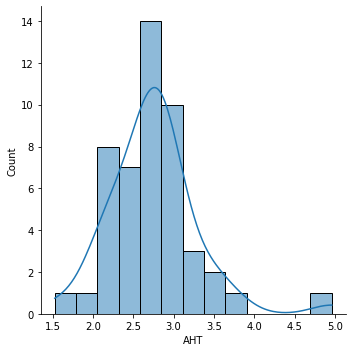

In [7]:
# let us also see visually how the aht is distributed through a histogram.
sns.displot(data=aht, x="AHT", kind="hist", kde=True)  # seems like the data is skewed towards right as evident by the KDE plot, but will confirm the same through normality test.

In [8]:
# now let us perform the normality test.
test_result = stats.anderson(aht["AHT"], dist="norm")
print(test_result)

test_statistic = test_result[0]
critical_value = test_result[1][2]
sig_level = test_result[2][2]

if test_statistic > critical_value:
    print("Verdict: Reject the null hypothesis")
    print(f"The given data is not normally distributed at {100 - (sig_level):.0f}% confidence level")
else:
    print("Verdict: Fail to reject the null hypothesis")
    print(f"The given data is normally distributed at {100 - (sig_level):.0f}% confidence level")

AndersonResult(statistic=0.9772587233244394, critical_values=array([0.537, 0.612, 0.734, 0.856, 1.018]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Verdict: Reject the null hypothesis
The given data is not normally distributed at 95% confidence level


In [9]:
# let us also perform the shapiro wilk test to check for normality.
aht_data = aht["AHT"]
test_result = stats.shapiro(aht)
print("Test Statistic:", test_result[0])
print("P Value:", test_result[1])

signf_level = 0.05

if test_result[1] < signf_level:
    print("Verdict: Reject the null hypothesis")
else:
    print("Verdict: Fail to reject the null hypothesis") 

Test Statistic: 0.9121401309967041
P Value: 0.0015880848513916135
Verdict: Reject the null hypothesis


##### One Sample T-Test
- Usage: When Project Y is Continuous & Factor X is Discrete (Y is Normal).
- Project Objective: Centering
- Test Objective: To compare the mean of a sample with a standard hypothesized value. 
- Null Hypothesis(H0): μ = standard value
- Alternate Hypothesis(Ha): μ != standard value

In [10]:
# here in the above example we are testing a hypothesis whether there is a significant difference between the hypothesized value which is 3 hours & the mean cycle time.
# thus HO: Mean Cycle time = 3 Hours & Ha: Mean Cycle Time != 3 Hours
# let us now take a subset from the data frame containing only the cycle time data.
cycle_time = df["Cycle Time"]
cycle_time.head()

0    5.75
1    4.61
2    2.96
3    4.65
4    3.13
Name: Cycle Time, dtype: float64

<AxesSubplot:ylabel='Cycle Time'>

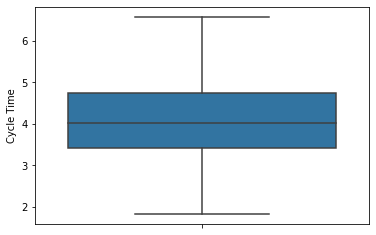

In [11]:
# let us also create the box plot for cycle time data.
sns.boxplot(y=cycle_time)

In [12]:
# now let us perform the One Sample T-Test.
test_result = stats.ttest_1samp(cycle_time, popmean=3)
alpha = 0.05
print("T-Test Result:", test_result)

if test_result[1] < alpha:
    print("Verdict: Reject the null hypothesis")
else:
    print("Verdict: Fail to reject the null hypothesis")   

# conclusion : here p value comes out to be 0.00000017978 which is way below the significance level i.e alpha value of 0.05, hence we reject the null hypothesis.

T-Test Result: Ttest_1sampResult(statistic=6.526673444217735, pvalue=1.797826765712201e-07)
Verdict: Reject the null hypothesis


##### Two Sample T Test
- Usage: When Project Y is Continuous & Factor X is Discrete (Y is Normal)
- Project Objective: Centering
- Test Objective: To compare the mean of data taken from two subgroups.
- Variance of two samples can be equal or unequal & in both these conditions the approach of performing the test will vary.
- Null Hypothesis(H0): μ1 = μ2
- Alternate Hypothesis(Ha): μ1 != μ2

In [13]:
# now from the above dataset let us test whether there a significant difference in the mean cycle time for transactions that happened in branch located in Delhi,
# with the mean cycle time for transactions that happened in branch located in Hyderabad.
# let us now create two subsets from the data frame one containing data for cycle time for delhi & other for hyderabad.
ct_city = df[["Cycle Time", "City"]]
ct_del = ct_city[ct_city["City"] == "Del"]
ct_hyd = ct_city[ct_city["City"] == "Hyd"]

<AxesSubplot:xlabel='City', ylabel='Cycle Time'>

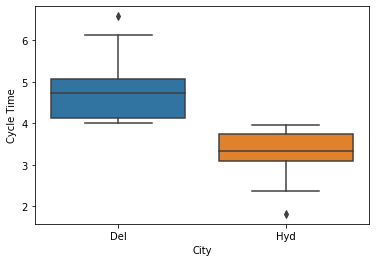

In [14]:
# let us also create the box plot for cycle time data grouped by city.
sns.boxplot(data=ct_city, y="Cycle Time", x="City")  # clearly there is a huge difference in the cycle times for both the cities, however let us statistically confirm the same.

In [15]:
# now let us perform the Two Sample T-Test assuming equal variances.
test_result = stats.ttest_ind(ct_del["Cycle Time"], ct_hyd["Cycle Time"], equal_var=True)
alpha = 0.05
print(test_result)

if test_result[1] < alpha:
    print("Verdict: Reject the null hypothesis")
else:
    print("Verdict: Fail to reject the null hypothesis")

# conclusion : here p value comes out to be 0.000000113531 which is way below the significance level i.e alpha value of 0.05, hence we reject the null hypothesis.

Ttest_indResult(statistic=6.732824703565441, pvalue=1.1353097103588846e-07)
Verdict: Reject the null hypothesis


In [16]:
# also let us perform the Two Sample T-Test assuming unequal variances.
test_result = stats.ttest_ind(ct_del["Cycle Time"], ct_hyd["Cycle Time"], equal_var=False)
alpha = 0.05
print(test_result)

if test_result[1] < alpha:
    print("Verdict: Reject the null hypothesis")
else:
    print("Verdict: Fail to reject the null hypothesis")

# conclusion : here p value comes out to be 0.000000076949 which is way below the significance level i.e alpha value of 0.05, hence we reject the null hypothesis.

Ttest_indResult(statistic=6.874723550564371, pvalue=7.694908298803646e-08)
Verdict: Reject the null hypothesis


##### ANOVA - One Way
- Usage: When Project Y is Continuous & Factor X is Discrete (Y is Normal).
- Project Objective: Centering
- Test Objective: To compare the mean of data taken from more than two subgroups.
- Null Hypothesis(H0): All means are equal.
- Alternate Hypothesis(Ha): At least one of the mean is different.
- Assumption : The variance amongst the sub groups are assumed to be equal.

In [17]:
# now from the dataset let us test whether there is a difference in the mean cycle time of transactions that happened in morning shift, afternoon shift & evening shift.

# let us first install & import the statsmodels library.
# %pip install statsmodels

import statsmodels.stats.oneway as oneway

In [18]:
# let us now create three subsets from the data frame one containing data for cycle time for morning shift, other for afternoon shift & one for evening shift.
ct_shift = df[["Cycle Time", "Shift"]]
ct_m = ct_shift[ct_shift["Shift"] == "M"]
ct_a = ct_shift[ct_shift["Shift"] == "A"]
ct_e = ct_shift[ct_shift["Shift"] == "E"]
ct_shift["Shift"].unique()

array(['M', 'A', 'E'], dtype=object)

<AxesSubplot:xlabel='Shift', ylabel='Cycle Time'>

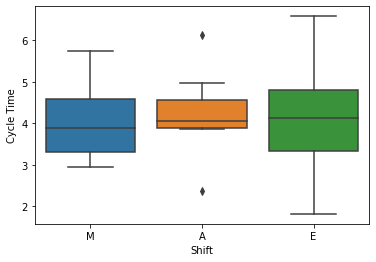

In [19]:
# let us also create the box plot of the cycle time basis the shifts.
sns.boxplot(data=ct_shift, x="Shift", y="Cycle Time")  # there is no significant difference in the cycle times amongst three shifts, let us next confirm the same statistically.

In [20]:
# let us now perform the ANOVA test.
test_result = stats.f_oneway(ct_m["Cycle Time"], ct_a["Cycle Time"], ct_e["Cycle Time"])
alpha = 0.05
print(test_result)

if test_result[1] < alpha:
    print("Verdict: Reject the null hypothesis")
else:
    print("Verdict: Fail to reject the null hypothesis")

F_onewayResult(statistic=0.18999329815502175, pvalue=0.8278907282649468)
Verdict: Fail to reject the null hypothesis


In [21]:
# let us see an alternative way to perform the ANOVA Test.
test_result = oneway.anova_oneway((ct_m["Cycle Time"], ct_a["Cycle Time"], ct_e["Cycle Time"]), use_var="equal")
alpha = 0.05
print(test_result)

if test_result[1] < alpha:
    print("Verdict: Reject the null hypothesis")
else:
    print("Verdict: Fail to reject the null hypothesis")

statistic = 0.1899932981550214
pvalue = 0.8278907282649468
df = (2.0, 32.0)
df_num = 2.0
df_denom = 32.0
nobs_t = 35.0
n_groups = 3
means = [3.96083333 4.212      4.15846154]
nobs = [12. 10. 13.]
vars_ = [0.67268106 0.91197333 1.5136641 ]
use_var = equal
welch_correction = True
tuple = (0.1899932981550214, 0.8278907282649468)
Verdict: Fail to reject the null hypothesis


##### One Variance Test
- Usage: When Project Y is Continuous & Factor X is Discrete.(Y is normal) 
- Project Objective: Variation
- Test Objective: To compare the variance or standard deviation of a sample with a standard value. 
- Null Hypothesis(H0): σ = standard value
- Alternate Hypothesis(Ha): σ ≠ standard value 

In [22]:
# let us first import the banking transactions data.
df = pd.read_csv("/Users/rahul_arora/Downloads/Cycle Time - Sheet1.csv")
df.head()

,Transaction ID,Cycle Time,City,Documented process available,Agent ID,Branch,Tenure,Shift,Day of Week,Week of Month
0,1001,5.75,Del,N,1,CP,625,M,Mon,3
1,1002,4.61,Del,Y,2,CP,702,M,Tue,4
2,1003,2.96,Hyd,Y,3,JP,887,M,Thu,5
3,1004,4.65,Del,N,1,CP,694,M,Tue,3
4,1005,3.13,Hyd,Y,1,JP,867,M,Wed,1


In [23]:
# Let us take the subset of cycle time column data from the above data frame.
ct = df["Cycle Time"]
ct.head()

0    5.75
1    4.61
2    2.96
3    4.65
4    3.13
Name: Cycle Time, dtype: float64

In [24]:
# here in the above example we are testing a hypothesis whether there is a significant difference between the hypothesized std deviation value which is 1.5 hours & the std deviation of cycle time.
# thus HO: Std Deviation Cycle time = 1.5 Hours & Ha: Std Deviation Cycle Time != 1.5 Hours
# let us first calculate the standard deviation of the cycle time data.
ct_std_dev = ct.std()
ct_n_val = ct.count()
dof = ct_n_val - 1
std_sd = 1.5
signf_level = 0.05
print("Standard Deviation:", ct_std_dev)
print("Count:", ct_n_val)
print("Degree of Freedom:", dof)

# now let us calculate the test statistic value.
test_stat = (dof)*(ct_std_dev**2) / (std_sd**2)
print("Test Statistic:", test_stat)

# now let us calculate the critical values based on significance level.
critical_value_1 = stats.chi2.isf((signf_level/2), dof)
critical_value_2 = stats.chi2.isf((1-(signf_level/2)), dof)
print(critical_value_1)
print(critical_value_2)

Standard Deviation: 1.0025297413807437
Count: 35
Degree of Freedom: 34
Test Statistic: 15.187662222222217
51.96599519512189
19.806252939214588


##### Two Variances Test
- Usage: When Project Y is Continuous & Factor X is Discrete. 
- Project Objective: Variation
- Test Objective: To compare the variance or standard deviation of two samples or subgroups. 
- Null Hypothesis(H0): σ1 = σ2 or 
- Alternate Hypothesis(Ha): σ1 ≠ σ2 

In [25]:
# let us an perform the Two Variances Test to check whether there a significant difference in the cycle time standard deviation for transactions that happened in branch located in Delhi,
# with the cycle time standard devaition for transactions that happened in branch located in Hyderabad.
data1 = ct_del["Cycle Time"]
data2 = ct_hyd["Cycle Time"]

signf_level = 0.05
datasets_normality = input("Are the data sets normally distributed, Yes / No:")

if datasets_normality == "Yes":
    print(stats.bartlett(data1, data2))
    print(data1.std(), data2.std())
else:
    print(stats.levene(data1, data2))
    print(data1.std(), data2.std())    

if test_result[1] < signf_level:
    print("Verdict: Reject the null hypothesis")
else:
    print("Verdict: Fail to reject the null hypothesis")

LeveneResult(statistic=0.5015154291793472, pvalue=0.48380749936188994)
0.7266308537770872 0.5711125837637736
Verdict: Fail to reject the null hypothesis


##### Test of Equal Variances
- Usage: When Project Y is Continuous & Factor X is Discrete. 
- Project Objective: Variation
- Test Objective: To compare the variance or standard deviation of more than two samples or subgroups. 
- Null Hypothesis(H0): All variances are equal
- Alternate Hypothesis(Ha): At-least one variance is different.

In [26]:
# now from the dataset let us test whether there is a difference in the cycle time standard deviation of transactions that happened in morning shift, afternoon shift & evening shift.
ct_shift = df[["Cycle Time", "Shift"]]
ct_m = ct_shift[ct_shift["Shift"] == "M"]
ct_a = ct_shift[ct_shift["Shift"] == "A"]
ct_e = ct_shift[ct_shift["Shift"] == "E"]

data1 = ct_m["Cycle Time"]
data2 = ct_a["Cycle Time"]
data3 = ct_e["Cycle Time"]

signf_level = 0.05
datasets_normality = input("Are the data sets normally distributed, Yes / No:")

test_result1 = stats.bartlett(data1, data2, data3)
test_result2 = stats.levene(data1, data2, data3)

if datasets_normality == "Yes":
    print(test_result1)
    print(data1.std(), data2.std(), data3.std())
else:
    print(test_result2)
    print(data1.std(), data2.std(), data3.std())    

if test_result1[1] < signf_level or test_result2[1] < signf_level:
    print("Verdict: Reject the null hypothesis")
else:
    print("Verdict: Fail to reject the null hypothesis")

LeveneResult(statistic=1.2821357033525596, pvalue=0.29131385919753805)
0.8201713605131922 0.9549729490060613 1.230310571589183
Verdict: Fail to reject the null hypothesis


<AxesSubplot:xlabel='Cycle Time', ylabel='Shift'>

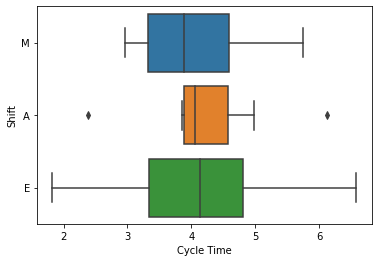

In [27]:
# let us also have a look at the box plot for cycle time pertaining to the three shifts.
sns.boxplot(data=ct_shift, x="Cycle Time", y="Shift") # as also evident from the overalapping box plots that there is no significant difference in the spread of cycle time. 

##### One Sample Wilcoxon Test
- Usage: When Project Y is Continuous & Factor X is Discrete (Y is Non-Normal).
- Project Objective: Centering
- Test Objective: To compare the median of a sample with a standard value. 
- Null Hypothesis(H0): median = standard value.
- Alternate Hypothesis(Ha): median ≠ standard value.

In [28]:
# let us first import the dataset.
aht = pd.read_csv("/Users/rahul_arora/Downloads/CT Data - Sheet2.csv")
aht.head()

,AHT
0,2.14990
1,2.24806
2,2.69727
3,3.56381
4,2.98438


In [29]:
# here we are testing a hypothesis whether there is a significant difference between the hypothesized value which is 3 hours & the median cycle time.
# thus HO: Median Cycle time = 2.5 Hours & Ha: Median Cycle Time != 2.5 Hours
data = aht["AHT"]
alpha = 0.05
std_val = 2.5

test_result = stats.wilcoxon(data - std_val)
print("Test Statistic:", test_result[0])
print("P Value:", test_result[1])

if test_result[1] < alpha:
    print("Verdict: Reject the null hypothesis")
else:
    print("Verdict: Fail to reject the null hypothesis")


Test Statistic: 292.0
P Value: 0.0023978917789683196
Verdict: Reject the null hypothesis


##### Mann Whitney Test
- Usage: When Project Y is Continuous & Factor X is Discrete (Y is Non-Normal).
- Project Objective: Centering
- Test Objective: To compare the median of data taken from two subgroups.
- Null Hypothesis(H0): median1 = median2
- Alternate Hypothesis(Ha): median1 ≠ median2  

In [30]:
# let us first import the dataset.
df = pd.read_csv("/Users/rahul_arora/Downloads/Final data for BO plus Voice process.xls - Data.csv")
df.head()

,Emp ID,User Name,Thin Client User ID,Process,Location,Age,Qualification,Marital Status,A.M.,Trainer,...,Month,Date,Total Hours,Bills Processed,AHT,Work Basket - Hrs. Paid,Work Basket/H (Productive Hours),Capacity Utilization,W/B Error%,Voice Quality Scores
0,17425,MANISH BHAGI,NAVNKUMJHA,Maglum Mortigage,Bangalore,40,B.A,Married,Ajay,Ruhani,...,June,1/6/2010,8.0,167,2.15,20.88,27.91,75%,8.33%,100.00%
1,9752,PRIYANKA SIROHI,JAIKUMYAD,Maglum Mortigage,Bangalore,31,B.A,Married,Ajay,Ruhani,...,June,1/6/2010,8.0,152,2.25,19.00,26.69,71%,0.00%,100.00%
2,17378,SARVAGAYAM,HARSKUMSIN,Maglum Mortigage,Bangalore,27,B.A,Married,Ajay,Ruhani,...,June,1/6/2010,8.0,127,2.70,15.88,22.24,71%,0.00%,100.00%
3,16235,ZAFAR KHAN,JYOTAHL,Maglum Mortigage,Bangalore,34,B.A,Married,Monica,Kishore,...,June,1/6/2010,8.0,82,3.56,10.25,16.84,61%,0.00%,100.00%
4,9716,MANISHA BANSAL,ALOKNATYAD,Maglum Mortigage,Bangalore,27,B.A,Married,Pardeep,Sudesh,...,June,1/6/2010,8.0,71,2.98,8.88,20.10,44%,0.00%,100.00%


In [31]:
# let us now create a subset of data on which the test is to be performed.
subset = df[["AHT", "Marital Status"]]
data1 = subset[subset["Marital Status"] == "Married"]
data2 = subset[subset["Marital Status"] == "Unmarried"]

In [32]:
# let us now perform the Mann Whitney Test.
# here we are testing whether is a significant difference between the median handling time taken by agents who are married compared to those who are unmarried.
test_result = stats.mannwhitneyu(data1["AHT"], data2["AHT"])
print("Test Statistic:", test_result[0])
print("P Value:", test_result[1])

if test_result[1] < alpha:
    print("Verdict: Reject the null hypothesis")
else:
    print("Verdict: Fail to reject the null hypothesis")

Test Statistic: 1331170.5
P Value: 0.0017710894640086718
Verdict: Reject the null hypothesis


##### Mood's Median Test
- Usage: When Project Y is Continuous & Factor X is Discrete (Y is Non-Normal).
- Project Objective: Centering
- Test Objective: To compare the median of data taken from two subgroups.
- Null Hypothesis(H0): All medians are equal.
- Alternate Hypothesis(Ha): Atleast one median is different.

In [33]:
# let us consider the above voice process data set in order to test whether there is a significant difference in median handling time taken amongst teams trained by different trainers.
# let us first create a subset of data on which the test is to be performed.
subset = df[["AHT", "Trainer"]]
data1 = subset[subset["Trainer"] == "Ruhani"]
data2 = subset[subset["Trainer"] == "Kishore"]
data3 = subset[subset["Trainer"] == "Sudesh"]
data4 = subset[subset["Trainer"] == "Varun"]
data5 = subset[subset["Trainer"] == "Vinay"]
data6 = subset[subset["Trainer"] == "Lalit"]
data7 = subset[subset["Trainer"] == "Gagan"]
data8 = subset[subset["Trainer"] == "Praveen"]

In [34]:
# now let us perform the Moods Median Test.
signf_level = 0.05

test_result = stats.median_test(data1["AHT"], data2["AHT"], data3["AHT"], data4["AHT"], data5["AHT"], data6["AHT"], data7["AHT"], data8["AHT"])
print("Test Statistic:", test_result[0])
print("P Value:", test_result[1])
print("Grand Median:", test_result[2])
print("N <= Grand Median:", test_result[3][0])
print("N > Grand Median:", test_result[3][1])

if test_result[1] < alpha:
    print("Verdict: Reject the null hypothesis")
else:
    print("Verdict: Fail to reject the null hypothesis")

Test Statistic: 51.53130974777393
P Value: 7.221638610243628e-09
Grand Median: 2.67
N <= Grand Median: [164 213 199 207 235 206 257 183]
N > Grand Median: [275 231 245 157 203 191 199 206]
Verdict: Reject the null hypothesis


##### One Proportion 
- Usage: When Project Y is Discrete (Category) & Factor X is Discrete. 
- Test Objective: To compare the proportion of an event in a sample with a standard value. 
- Null Hypothesis(H0): Proportion = standard value
- Alternate Hypothesis(Ha): Proportion ≠ standard value

In [35]:
# let's first import the dataset.
df = pd.read_csv("/Users/rahul_arora/Downloads/Pre-Post Analysis.xlsx - Sheet2.csv")
df.head()

,Defective,Definition
0,0,Within 60 days
1,0,Within 60 days
2,0,Within 60 days
3,0,Within 60 days
4,1,Defective


In [36]:
# here in this case we will test whether there is a significant difference between the error proportion calculated for the dataset & the hypothesized standard value which is taken as 0.2.
# let us now create the subset of the data on which the test needs to be performed.
data = df["Defective"]
signf_level = 0.05

# let us now calculate the proportion of defectives from the dataset.
total_count = data.count()
def_count = data[data == 1].count()
prop_calc = def_count / total_count
print("Total Samples:", total_count)
print("Defective Samples:", def_count)
print("Proportion:", prop_calc)

# now let us perform the One Proportion Test.
test_result = stats.binom_test(def_count, total_count, p=0.2)
print("P Value:", test_result)

if test_result < signf_level:
    print("Verdict: Reject the null hypothesis")
else:
    print("Verdict: Fail to reject the null hypothesis")

Total Samples: 120
Defective Samples: 26
Proportion: 0.21666666666666667
P Value: 0.6481381089976687
Verdict: Fail to reject the null hypothesis


In [37]:
# there is another alternative way to perform the above test.
grouped_data = df.groupby("Definition").count()
signf_level = 0.05
print(grouped_data)
test_result = stats.binom_test(grouped_data, p=0.2)
print("P Value:", test_result)

if test_result < signf_level:
    print("Verdict: Reject the null hypothesis")
else:
    print("Verdict: Fail to reject the null hypothesis")

                Defective
Definition               
Defective              26
Within 60 days         94
P Value: [0.64813811]
Verdict: Fail to reject the null hypothesis


##### Two Proportions Test
- Usage: When Project Y is Discrete (Category) & Factor X is Discrete. 
- Test Objective: To compare the proportion of an event between two samples or subgroups.
- Null Hypothesis(H0): Proportion 1 = Proportion 2 
- Alternate Hypothesis(Ha): Proportion 1 ≠ Proportion 2

In [38]:
# let us first import the dataset.
df = pd.read_csv("/Users/rahul_arora/Downloads/Analyze - Sheet2.csv")
df.head()

,TAT with Tax Issue,TAT without Tax Issue
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [39]:
# now we will test whether there is significant difference between the TAT miss proportion for invoices having tax issues & the ones which are not having any tax issue.

# let us first import the proportion module from the statsmodels library.
from statsmodels.stats import proportion

# let us now create subsets from the above data & calculate the defective counts & proportions.
data1 = df["TAT with Tax Issue"]
data2 = df["TAT without Tax Issue"]
signf_level = 0.05

total_count1 = data1.count()
print("Total Count for subgroup 1:", total_count1)

total_count2 = data2.count()
print("Total Count for subgroup 2:", total_count2)

def_count1 = data1[data1 == 1].count()
print("Defective count for subgroup 1:", def_count1)

def_count2 = data2[data2 == 1].count()
print("Defective count for subgroup 2:", def_count2)

def_prop1 = round((def_count1 / total_count1), 2)
print("Defective Proportion for Subgroup 1:", def_prop1)

def_prop2 = round((def_count2 / total_count2), 2)
print("Defective Proportion for Subgroup 2:", def_prop2)

# let us now perform the Two Proportion Test.
test_result = proportion.test_proportions_2indep(def_count1, total_count1, def_count2, total_count2, method="score")
print(test_result)

if test_result[1] < signf_level:
    print("Verdict: Reject the null hypothesis")
else:
    print("Verdict: Fail to reject the null hypothesis")

Total Count for subgroup 1: 180
Total Count for subgroup 2: 180
Defective count for subgroup 1: 57
Defective count for subgroup 2: 23
Defective Proportion for Subgroup 1: 0.32
Defective Proportion for Subgroup 2: 0.13
statistic = 4.3042960267289105
pvalue = 1.6751754890081363e-05
compare = diff
method = score
variance = 0.0019257883696138104
alternative = two-sided
prop1_null = 0.2222222222222222
prop2_null = 0.2222222222222222
tuple = (4.3042960267289105, 1.6751754890081363e-05)
diff = 0.18888888888888888
ratio = 2.4782608695652173
odds_ratio = 3.1633085896076354
value = 0
Verdict: Reject the null hypothesis


##### Chi_Squared test
- Usage: When Project Y is Discrete (Categorical) & Factor X is Discrete (Categorical). 
- Test Objective: To compare the proportion of an event between more than two samples or subgroups.
- Null Hypothesis(H0): Proportion 1 = Proportion 2 = Proportion 3
- Alternate Hypothesis(Ha): Proportion 1 ≠ Proportion 2 ≠ Proportion 3

In [40]:
# Let us first import a dataset.
df = pd.read_csv("/Users/rahul_arora/Downloads/Analyze.xls - Sheet1.csv")
df.head()

,Invoice No,Defectives,Analyst Name,Analyst Experience,Product Type,Customer,Tax Issue,Customer Region,Customer Address,Unnamed: 9,Unnamed: 10
0,420765,0,ABC,1.2,A,Individual,Y,Asia,Correct,0.0,Within 60 Days
1,420789,1,DEF,1.8,B,Government,Y,US,Correct,1.0,More than 60 Days
2,420819,1,GHI,2.0,B,Individual,Y,Europe,Incorrect,NaN,NaN
3,420675,0,JKL,2.4,A,Individual,N,Europe,Incorrect,NaN,NaN
4,420167,0,MNO,3.2,C,Corporate,N,US,Incorrect,NaN,NaN


In [41]:
# here we will test whether there is a significant difference in terms of TAT miss proportion amongst customers belonging to Asia, US & Europe regions.
data_table = df.pivot_table(index="Defectives", columns="Customer Region", aggfunc="count")["Invoice No"]
data_table

Customer Region,Asia,Europe,US
Defectives,,,
0,2,6,8
1,6,4,4


In [42]:
# now let us perform the Chi Squared Test.
signf_level = 0.05

test_result = stats.chi2_contingency(data_table)
print(f"Test Statistic: {test_result[0]:.2f}")
print(f"P Value: {test_result[1]:.3f}")
print(f"Degrees of Freedom: {test_result[2]}")
print("Expected Value:", test_result[3])

if test_result[1] < signf_level:
    print("Verdict: Reject the null hypothesis")
else:
    print("Verdict: Fail to reject the null hypothesis")

Test Statistic: 3.62
P Value: 0.164
Degrees of Freedom: 2
Expected Value: [[4.26666667 5.33333333 6.4       ]
 [3.73333333 4.66666667 5.6       ]]
Verdict: Fail to reject the null hypothesis


##### Correlation Test
- Usage: When both Project Y & Factor X are Continuous. 
- Project Objective: Centering & Variation
- Test Objective: To check for linear relationship between two variables.
- Null Hypothesis(H0): There is no linear realtionship between two variables.
- Alternate Hypothesis(Ha): There is a linear relationship between two variables.

In [43]:
# Let us first import a dataset.
df = pd.read_csv("/Users/rahul_arora/Downloads/Cycle Time - Sheet1.csv")
df.head()

,Transaction ID,Cycle Time,City,Documented process available,Agent ID,Branch,Tenure,Shift,Day of Week,Week of Month
0,1001,5.75,Del,N,1,CP,625,M,Mon,3
1,1002,4.61,Del,Y,2,CP,702,M,Tue,4
2,1003,2.96,Hyd,Y,3,JP,887,M,Thu,5
3,1004,4.65,Del,N,1,CP,694,M,Tue,3
4,1005,3.13,Hyd,Y,1,JP,867,M,Wed,1


<AxesSubplot:xlabel='Tenure', ylabel='Cycle Time'>

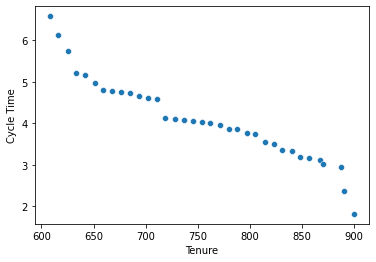

In [44]:
# now we will see whether there is a linear relationship between two cycle time & agent tenure.

# let us first plot a scatter plot between cycle time & agent tenure.
sns.scatterplot(data=df, y="Cycle Time", x="Tenure") # seems like there is a negative relationship between cycle time & agent tenure i.e. cycle time decreases with increase in agent tenure.
# however will confirm the same through correlation.

In [45]:
# let us first create the subsets from the above data frame.
data1 = df["Cycle Time"]
data2 = df["Tenure"]

# let us now perform the correlation.
signf_level = 0.05
test_result = stats.pearsonr(data1, data2)
print(f"Pearson Coefficient: {test_result[0]:.3f}")
print(f"P Value: {test_result[1]:.3f}")

if test_result[1] < signf_level:
    print("Verdict: Reject the null hypothesis")
else:
    print("Verdict: Fail to reject the null hypothesis")

Pearson Coefficient: -0.960
P Value: 0.000
Verdict: Reject the null hypothesis


##### Simple Linear Regression 
- Usage: When both Project Y & Factor X are Continuous. 
- Project Objective: Centering & Variation
- Test Objective: To study the relationship b/w two variables & also how much % variation in one variable is explained by the other variable.
- Null Hypothesis(H0): There is no significant relationship between two variables.
- Alternate Hypothesis(Ha): There is no significant relationship between two variables.

In [46]:
# now from the above data let us test whether there is a significant relationship between cycle time & agent tenure.
# let us first import the statsmodels.api library.
import statsmodels.api as sm

# let us now create the subsets of data for dependent & independent variable.
y_data = df["Cycle Time"]
x_data = df["Tenure"]
x_stat = sm.add_constant(x_data)

reg_summary = sm.OLS(y_data, x_stat).fit()
reg_summary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cycle Time   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     388.3
Date:                Wed, 23 Feb 2022   Prob (F-statistic):           8.06e-20
Time:                        19:39:43   Log-Likelihood:                -4.6762
No. Observations:                  35   AIC:                             13.35
Df Residuals:                      33   BIC:                             16.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3397      0.421     29.336      0.000      11.484      13.196
Tenure        -0.0109      0.001    -19.704      0.000      -0.012      -0.010
==============================================================================
Omnibus:                        6.528   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                6.131
Skew:                           0.535   Prob(JB):                       0.0466
Kurtosis:                       4.749   Cond. No.                     6.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Logistic Regression
- Usage: When Project Y is Discrete (Binary) & Factor X is Continuous.
- Test Objective: To check whether there is a significant relationship between two variables.
- Null Hypothesis(H0): There is no significant relationship between two variables.
- Alternate Hypothesis(Ha): There is a significant relationship between two variables.

In [47]:
# let us first import a dataset.
df = pd.read_csv("/Users/rahul_arora/Downloads/Analyze.xls - Sheet1.csv")
df.head()

,Invoice No,Defectives,Analyst Name,Analyst Experience,Product Type,Customer,Tax Issue,Customer Region,Customer Address,Unnamed: 9,Unnamed: 10
0,420765,0,ABC,1.2,A,Individual,Y,Asia,Correct,0.0,Within 60 Days
1,420789,1,DEF,1.8,B,Government,Y,US,Correct,1.0,More than 60 Days
2,420819,1,GHI,2.0,B,Individual,Y,Europe,Incorrect,NaN,NaN
3,420675,0,JKL,2.4,A,Individual,N,Europe,Incorrect,NaN,NaN
4,420167,0,MNO,3.2,C,Corporate,N,US,Incorrect,NaN,NaN


In [48]:
# here we will test whether there is a significant relationship between the probability of getting a defective or not as governed by analyst experience.
# let us first create the subsets of data from the above data frame.
y_data = df["Defectives"]
x_data = df["Analyst Experience"]

# let us perform the logistic regression test.
log_regr = sm.Logit(y_data, x_data).fit()
log_regr.summary()

Optimization terminated successfully.
         Current function value: 0.692597
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Defectives   No. Observations:                   30
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            0
Date:                Wed, 23 Feb 2022   Pseudo R-squ.:               -0.002422
Time:                        19:39:43   Log-Likelihood:                -20.778
converged:                       True   LL-Null:                       -20.728
Covariance Type:            nonrobust   LLR p-value:                       nan
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Analyst Experience    -0.0245      0.135     -0.182      0.856      -0.289       0.240
======================================================================================
"""